In [23]:
from matplotlib import pyplot as plt

In [24]:
image = plt.imread('images/face_det25.jpg')

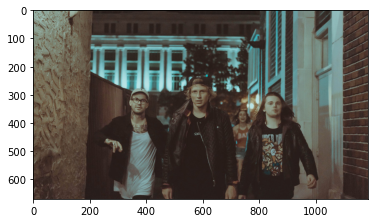

In [25]:
plt.imshow(image)

In [26]:
from skimage import data
from skimage.feature import Cascade
from skimage.filters import gaussian

In [27]:
trained_file = data.lbp_frontal_face_cascade_filename()
detector = Cascade(trained_file)

In [28]:
detected = detector.detect_multi_scale(img=image, 
                                       scale_factor=1.2, step_ratio=1, 
                                       min_size=(10,10), max_size=(100, 100))

In [29]:
def getFace(d, image):
    ''' Extracts the face rectangle from the image using the coordinates of the detected.'''
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
    # Extract the detected face
    face = image[x:width, y:height]
    return face


def mergeBlurryFace(original, gaussian_image, d):
    # X and Y starting points of the face rectangle
    x, y = d['r'], d['c']
    # The width and height of the face rectangle
    width, height = d['r'] + d['width'], d['c'] + d['height']
    original[x:width, y:height] = gaussian_image
    return original

In [34]:
for d in detected:  
    # Obtain the face rectangle from detected coordinates
    face = getFace(d, image)
    
    # Apply gaussian filter to extracted face
    blurred_face = gaussian(face, multichannel=True, sigma=8)
    
    # Merge this blurry face to our final image and show it
    resulting_image = mergeBlurryFace(image, blurred_face, d) 

ValueError: assignment destination is read-only